In [19]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop('Id', axis=1)
df = df.rename(columns={"Species":"Label"})

In [5]:
def train_test_split(df, test_size):
    unique_numbers = []
    [unique_numbers.append(random_num) for _ in range(test_size) if (random_num := random.randint(1, 150)) not in unique_numbers]
    print(unique_numbers)
    train_df = df.copy()
    test_df = df.iloc[unique_numbers]
    train_df.drop(unique_numbers, inplace=True)
    return train_df, test_df
train_test_split(df, 10)

[84, 113, 62, 74, 68, 116, 33, 128, 139]


(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Label
 0              5.1           3.5            1.4           0.2     Iris-setosa
 1              4.9           3.0            1.4           0.2     Iris-setosa
 2              4.7           3.2            1.3           0.2     Iris-setosa
 3              4.6           3.1            1.5           0.2     Iris-setosa
 4              5.0           3.6            1.4           0.2     Iris-setosa
 ..             ...           ...            ...           ...             ...
 145            6.7           3.0            5.2           2.3  Iris-virginica
 146            6.3           2.5            5.0           1.9  Iris-virginica
 147            6.5           3.0            5.2           2.0  Iris-virginica
 148            6.2           3.4            5.4           2.3  Iris-virginica
 149            5.9           3.0            5.1           1.8  Iris-virginica
 
 [141 rows x 5 columns],
      SepalLengthCm  Sepa

In [6]:
a , b = train_test_split(df, 10)
print(b.values)

data = a.values
# print(data)

[23, 89, 21, 149, 92, 139, 24, 16, 6, 122]
[[5.1 3.3 1.7 0.5 'Iris-setosa']
 [5.5 2.5 4.0 1.3 'Iris-versicolor']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [5.9 3.0 5.1 1.8 'Iris-virginica']
 [5.8 2.6 4.0 1.2 'Iris-versicolor']
 [6.9 3.1 5.4 2.1 'Iris-virginica']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [7.7 2.8 6.7 2.0 'Iris-virginica']]


# Now we will check data purity


In [7]:
def check_purity(data):
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

In [8]:
check_purity(a[a.PetalWidthCm<1.2].values)

False

### Classifier Function


In [9]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification, counts_unique_classes

classify_data(data)

('Iris-versicolor', array([45, 48, 47], dtype=int64))

In [10]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns -1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        for index in range(1,len(unique_values)):
            current_value = unique_values[index]
            previous_value = unique_values[index-1]
            potential_split = (current_value + previous_value) / 2
            potential_splits[column_index].append(potential_split)
            
    return potential_splits

In [11]:
Petal width ko value minus garera data points nikalyo ani tyo data points lai chai use garyo

SyntaxError: invalid syntax (802195136.py, line 1)

In [33]:
potential_splits = get_potential_splits(a.values)
print(potential_splits)

{0: [4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.5, 7.65, 7.800000000000001], 1: [2.1, 2.25, 2.3499999999999996, 2.45, 2.55, 2.6500000000000004, 2.75, 2.8499999999999996, 2.95, 3.05, 3.1500000000000004, 3.25, 3.3499999999999996, 3.45, 3.55, 3.6500000000000004, 3.75, 3.8499999999999996, 3.95, 4.05, 4.15, 4.300000000000001], 2: [1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.7999999999999998, 2.45, 3.15, 3.4, 3.55, 3.6500000000000004, 3.75, 3.8499999999999996, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.199999999999999, 6.35, 6.5, 6.65, 6.800000000000001], 3: [0.15000000000000002, 0.25, 0.35, 0.5, 0.8, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.1500000000000004, 2.25, 2.3499999999999996, 2.45]}


In [37]:
sns.lmplot(data=a, x="PetalWidthCm", y="PetalLengthCm", fit_reg=False, hue="Label", height=6 , aspect=1.2)

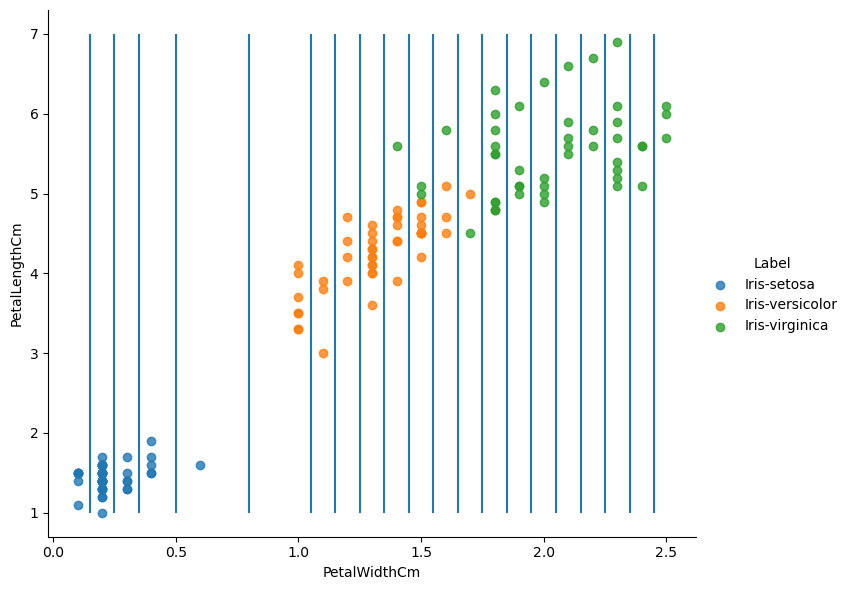

In [38]:
plt.vlines(x=potential_splits[3], ymin=1, ymax=7)
plt.show()